<a href="https://colab.research.google.com/github/CristianS1988/GooSL/blob/main/KMEANS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd

# Carga el dataset
df = pd.read_csv('df_arabica_clean.csv')



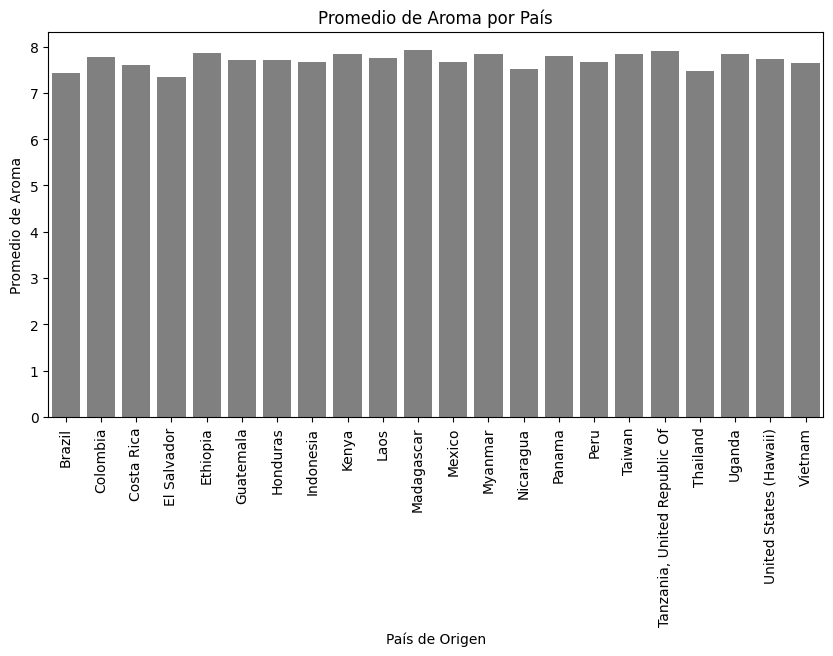

In [30]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Extraer la columna "Aroma" y agrupar por país
df_grouped = df.groupby('Country of Origin')['Aroma'].mean().reset_index()

# Crear un mapa Choropleth
fig = px.choropleth(df_grouped,
                    locations='Country of Origin',
                    locationmode='country names',
                    color='Aroma',
                    hover_name='Country of Origin',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Promedio de Aroma por País')

fig.show()

# Crear un gráfico de barras con el promedio de aroma por país
plt.figure(figsize=(10, 5))
sns.barplot(x=df_grouped['Country of Origin'], y=df_grouped['Aroma'], color='gray')
plt.title('Promedio de Aroma por País')
plt.xlabel('País de Origen')
plt.ylabel('Promedio de Aroma')
plt.xticks(rotation=90)
plt.show()


In [29]:
# Elimina las columnas irrelevantes para el clustering
columns_to_drop = ['ID', 'Farm Name', 'Lot Number', 'Mill', 'ICO Number', 'Company', 'In-Country Partner',
                   'Harvest Year', 'Grading Date', 'Owner', 'Status', 'Expiration', 'Certification Body',
                   'Certification Address', 'Certification Contact']
df = df.drop(columns=columns_to_drop)

# Manejo de valores faltantes
df = df.dropna()

# Visualiza los primeros registros del dataset
print(df.head())


   Unnamed: 0 Country of Origin   Altitude                Region  \
0           0          Colombia  1700-1930        Piendamo,Cauca   
1           1            Taiwan       1200                Chiayi   
2           2              Laos       1300  Laos Borofen Plateau   
3           3        Costa Rica       1900    Los Santos,Tarrazu   
4           4          Colombia  1850-2100         Popayan,Cauca   

                Producer  Number of Bags Bag Weight      Variety  \
0  Diego Samuel Bermudez               1      35 kg     Castillo   
1                    曾福森               1      80 kg        Gesha   
2             WU TAO CHI              19      25 kg         Java   
3    Santa Maria de Dota               1      22 kg        Gesha   
4       Camilo Merizalde               2      24 kg  Red Bourbon   

         Processing Method  Aroma  ...  Clean Cup  Sweetness  Overall  \
0  Double Anaerobic Washed   8.58  ...       10.0       10.0     8.58   
1             Washed / Wet   8.50  .

In [2]:
# Selecciona las características relevantes
selected_features = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body']

# Crea un nuevo DataFrame con las características seleccionadas
df_selected = df[selected_features]

# Visualiza los primeros registros del nuevo DataFrame
print(df_selected.head())


   Aroma  Flavor  Aftertaste  Acidity  Body
0   8.58    8.50        8.42     8.58  8.25
1   8.50    8.50        7.92     8.00  7.92
2   8.33    8.42        8.08     8.17  7.92
3   8.08    8.17        8.17     8.25  8.17
4   8.33    8.33        8.08     8.25  7.92


In [3]:
from sklearn.preprocessing import StandardScaler

# Crea una instancia del escalador
scaler = StandardScaler()

# Normaliza los datos
normalized_data = scaler.fit_transform(df_selected)

# Crea un nuevo DataFrame con los datos normalizados
df_normalized = pd.DataFrame(normalized_data, columns=df_selected.columns)

# Visualiza los primeros registros del nuevo DataFrame normalizado
print(df_normalized.head())


      Aroma    Flavor  Aftertaste   Acidity      Body
0  2.960969  2.703150    2.960059  3.454173  2.624031
1  2.684628  2.703150    1.149060  1.202235  1.190808
2  2.097404  2.415323    1.728580  1.862286  1.190808
3  1.233840  1.515864    2.054560  2.172898  2.276583
4  2.097404  2.091518    1.728580  2.172898  1.190808


In [4]:
from sklearn.cluster import KMeans

# Crea una instancia del algoritmo K-means
kmeans = KMeans(n_clusters=3, random_state=42)

# Aplica el algoritmo K-means a los datos normalizados
kmeans.fit(df_normalized)

# Obtiene las etiquetas de los grupos asignados a cada punto
labels = kmeans.labels_

# Agrega las etiquetas al DataFrame normalizado
df_normalized['Cluster'] = labels

# Visualiza los primeros registros del DataFrame con las etiquetas de los grupos
print(df_normalized.head())


      Aroma    Flavor  Aftertaste   Acidity      Body  Cluster
0  2.960969  2.703150    2.960059  3.454173  2.624031        2
1  2.684628  2.703150    1.149060  1.202235  1.190808        2
2  2.097404  2.415323    1.728580  1.862286  1.190808        2
3  1.233840  1.515864    2.054560  2.172898  2.276583        2
4  2.097404  2.091518    1.728580  2.172898  1.190808        2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


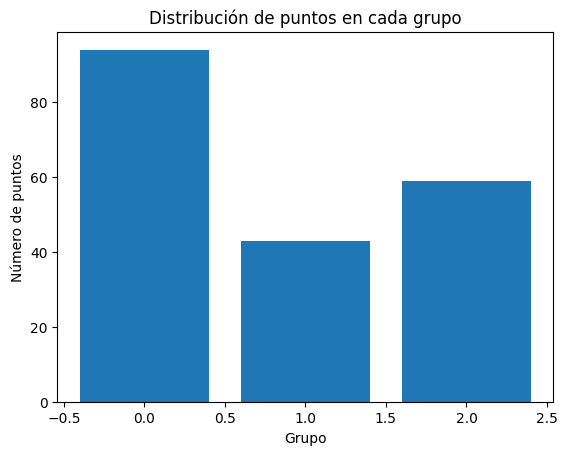

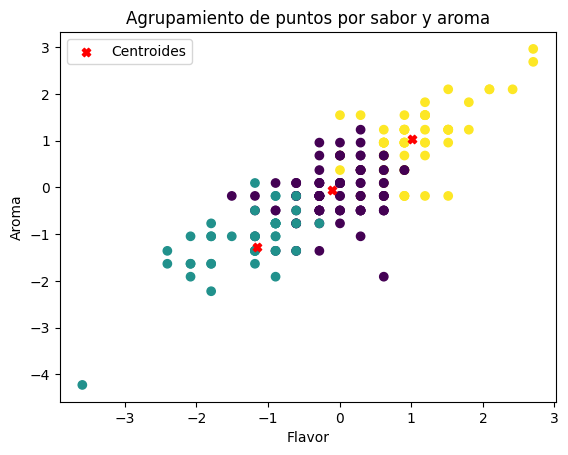

In [5]:
import matplotlib.pyplot as plt

# Contar el número de puntos en cada grupo
cluster_counts = df_normalized['Cluster'].value_counts()

# Visualizar la distribución de los puntos en cada grupo
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Grupo')
plt.ylabel('Número de puntos')
plt.title('Distribución de puntos en cada grupo')
plt.show()

# Calcular el centroide de cada grupo
cluster_centers = kmeans.cluster_centers_

# Visualizar los centroides en un gráfico de dispersión
plt.scatter(df_normalized['Flavor'], df_normalized['Aroma'], c=df_normalized['Cluster'], cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', label='Centroides')
plt.xlabel('Flavor')
plt.ylabel('Aroma')
plt.title('Agrupamiento de puntos por sabor y aroma')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


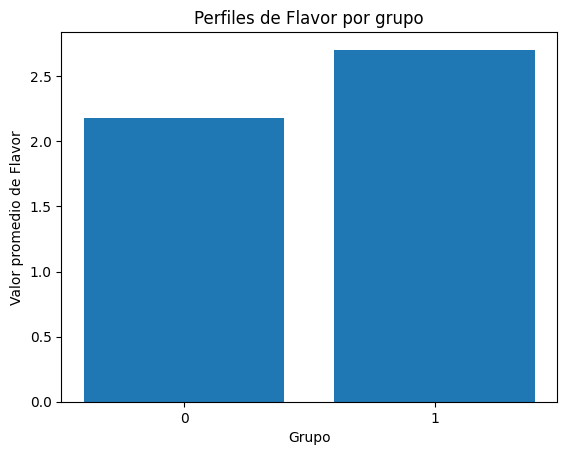

In [15]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Definir el DataFrame con los datos
data = {
    'Aroma': [2.960969, 2.684628, 2.097404, 1.233840, 2.097404],
    'Flavor': [2.703150, 2.703150, 2.415323, 1.515864, 2.091518],
    'Aftertaste': [2.960059, 1.149060, 1.728580, 2.054560, 1.728580],
    'Acidity': [3.454173, 1.202235, 1.862286, 2.172898, 2.172898],
    'Body': [2.624031, 1.190808, 1.190808, 2.276583, 1.190808]
}

df = pd.DataFrame(data)

# Aplicar el algoritmo de clustering k-means
k = 2  # Número de clusters deseados
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df)

# Obtener las etiquetas de cluster asignadas a cada punto de datos
cluster_labels = kmeans.labels_

# Agregar las etiquetas de cluster al DataFrame
df['Cluster_Label'] = cluster_labels

# Obtener las estadísticas descriptivas por grupo
grouped_data = df.groupby('Cluster_Label')
mean_values = grouped_data.mean()
median_values = grouped_data.median()
# ... Otros cálculos de estadísticas descriptivas ...

# Visualizar los resultados
plt.bar(range(len(mean_values)), mean_values['Flavor'], tick_label=mean_values.index)
plt.xlabel('Grupo')
plt.ylabel('Valor promedio de Flavor')
plt.title('Perfiles de Flavor por grupo')
plt.show()

# Otras visualizaciones, análisis e interpretación de los resultados
# ...



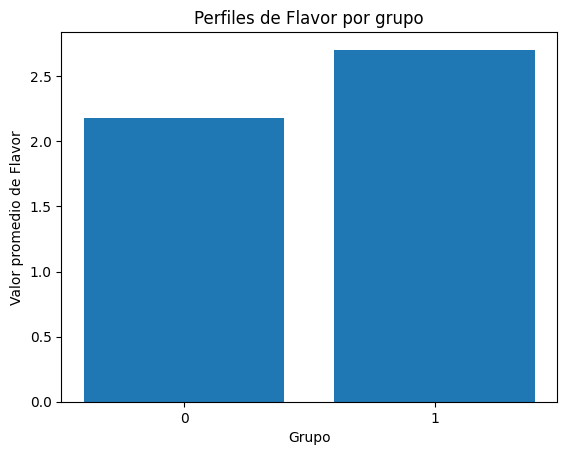

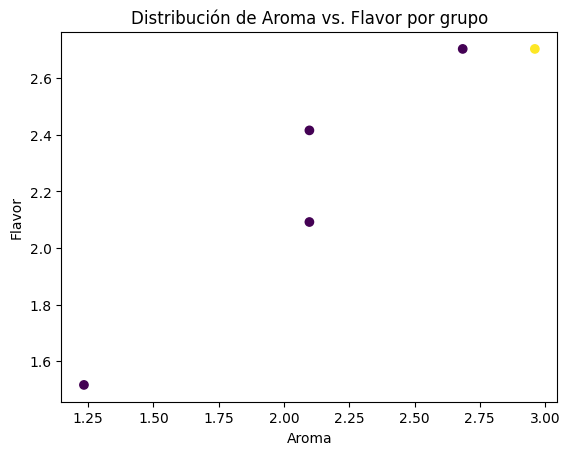

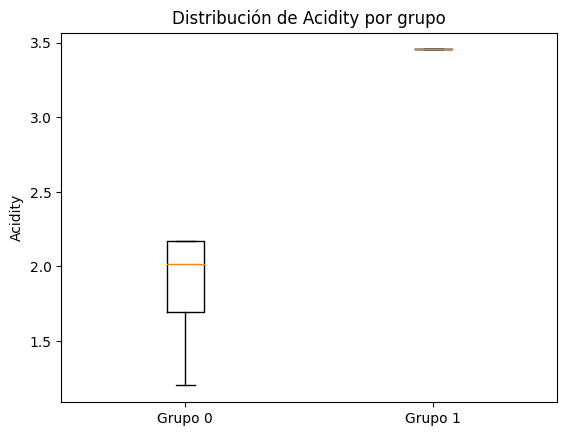

In [16]:
# Obtener las estadísticas descriptivas por grupo
grouped_data = df.groupby('Cluster_Label')
mean_values = grouped_data.mean()
median_values = grouped_data.median()
# ... Otros cálculos de estadísticas descriptivas ...

# Visualizar los resultados
plt.bar(range(len(mean_values)), mean_values['Flavor'], tick_label=mean_values.index)
plt.xlabel('Grupo')
plt.ylabel('Valor promedio de Flavor')
plt.title('Perfiles de Flavor por grupo')
plt.show()

# Otras visualizaciones, análisis e interpretación de los resultados
# Por ejemplo, puedes realizar gráficos de dispersión para comparar diferentes características entre los grupos:
plt.scatter(df['Aroma'], df['Flavor'], c=df['Cluster_Label'], cmap='viridis')
plt.xlabel('Aroma')
plt.ylabel('Flavor')
plt.title('Distribución de Aroma vs. Flavor por grupo')
plt.show()

# También puedes utilizar diagramas de caja para visualizar la distribución de diferentes características por grupo:
plt.boxplot([df[df['Cluster_Label'] == 0]['Acidity'], df[df['Cluster_Label'] == 1]['Acidity']])
plt.xticks([1, 2], ['Grupo 0', 'Grupo 1'])
plt.ylabel('Acidity')
plt.title('Distribución de Acidity por grupo')
plt.show()

# Realiza análisis e interpretación de los resultados obtenidos en cada visualización.
# Examina las características de los cafés dentro de cada grupo y busca patrones claros en términos de sabor, aroma, región de origen u otras características.
# Comunica tus hallazgos y conclusiones basadas en los resultados del análisis.



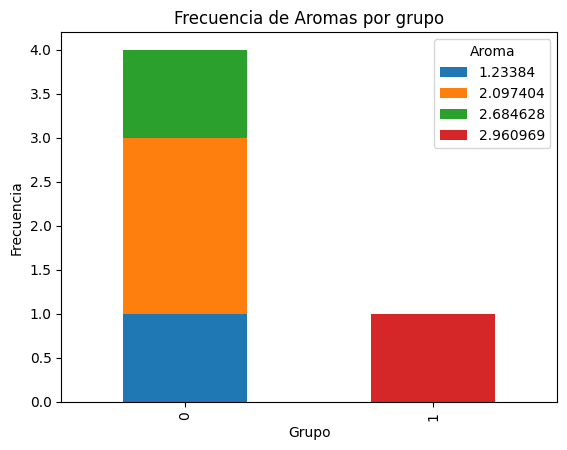

In [17]:
# Obtener la frecuencia de los aromas en cada grupo
aroma_counts = df.groupby(['Cluster_Label', 'Aroma']).size().unstack()

# Visualizar los aromas en un gráfico de barras apiladas
aroma_counts.plot(kind='bar', stacked=True)
plt.xlabel('Grupo')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Aromas por grupo')
plt.legend(title='Aroma')
plt.show()


In [27]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Extraer la columna "Aroma" y agrupar por país
df_grouped = df.groupby('Country of Origin')['Aroma'].mean().reset_index()

# Crear un mapa Choropleth
fig = px.choropleth(df_grouped,
                    locations='Country of Origin',
                    locationmode='country names',
                    color='Aroma',
                    hover_name='Country of Origin',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Promedio de Aroma por País')

fig.show()

# Crear un gráfico de barras con el promedio de aroma por país
plt.figure(figsize=(10, 5))
sns.barplot(x=df_grouped['Country of Origin'], y=df_grouped['Aroma'], color='gray')
plt.title('Promedio de Aroma por País')
plt.xlabel('País de Origen')
plt.ylabel('Promedio de Aroma')
plt.xticks(rotation=90)
plt.show()


KeyError: ignored

In [21]:
print(df.columns)


Index(['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Cluster_Label'], dtype='object')
